In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline

In [2]:
def read_csv(file_name):
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        return np.delete(np.array(list(csv_reader)[1:], dtype=float), 0, 1)


In [3]:
data = read_csv("./data/lab_1_train.csv")
train_x = data[:, 0]
train_y = data[:, 1]

data = read_csv("./data/lab_1_test.csv")
test_x = data[:, 0]
test_y = data[:, 1]

In [4]:
class LinearRegression:
    def __init__(self, x, y):
        self.X = x
        self.Y = y
        self.B = [0, 0]

    def update_weights(self, _alpha, pred):
        m = len(self.Y)

        self.B[1] = self.B[1] - _alpha * np.sum((pred - self.Y) * self.X) / m
        self.B[0] = np.mean(self.Y) - self.B[1] * np.mean(self.X)

    def predict(self, _x=None):
        Y_pred = np.array([])

        if _x is None:
            _x = self.X

        for x in _x:
            Y_pred = np.append(Y_pred, self.B[0] + (self.B[1] * x))

        return Y_pred

    def compute_loss(self, y_pred):
        m = len(self.Y)
        J = np.sum(y_pred - self.Y) ** 2 / (2 * m)
        return J

    def plot_best_fit(self, y_pred, plot_name, _x=None, _y=None, _c='r'):
        if _x is None:
            _x = self.X

        if _y is None:
            _y = self.Y

        plt.title(plot_name)
        plt.scatter(_x, _y, color='b', s=20)
        plt.plot(_x, y_pred, color=_c)
        plt.show()

    def b1(self):
        return self.B[1]

200 epochs elapsed
Current loss - weight: 5e-28 - 0.175
400 epochs elapsed
Current loss - weight: 2.1e-28 - 0.282
600 epochs elapsed
Current loss - weight: 4.6e-28 - 0.383
800 epochs elapsed
Current loss - weight: 3.4e-28 - 0.478
1000 epochs elapsed
Current loss - weight: 2e-28 - 0.567
1200 epochs elapsed
Current loss - weight: 3e-29 - 0.651
1400 epochs elapsed
Current loss - weight: 3.8e-28 - 0.73
1600 epochs elapsed
Current loss - weight: 5.5e-28 - 0.804
1800 epochs elapsed
Current loss - weight: 3.3e-28 - 0.873
2000 epochs elapsed
Current loss - weight: 9.5e-29 - 0.939
2200 epochs elapsed
Current loss - weight: 2.4e-28 - 1.0
2400 epochs elapsed
Current loss - weight: 2.4e-28 - 1.06
2600 epochs elapsed
Current loss - weight: 4.6e-29 - 1.11
2800 epochs elapsed
Current loss - weight: 3e-28 - 1.16
3000 epochs elapsed
Current loss - weight: 3.2e-28 - 1.21
3200 epochs elapsed
Current loss - weight: 1.2e-28 - 1.26
3400 epochs elapsed
Current loss - weight: 7.7e-29 - 1.3
3600 epochs elapsed

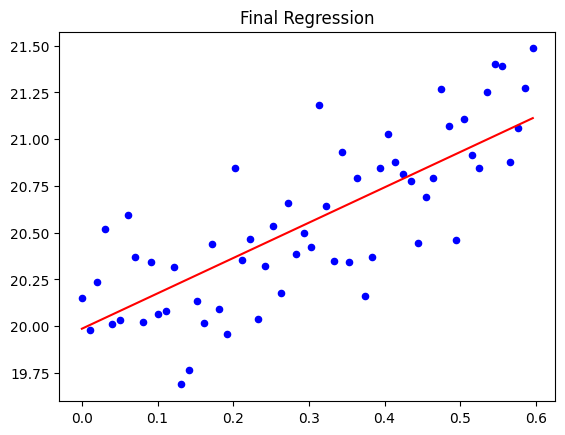

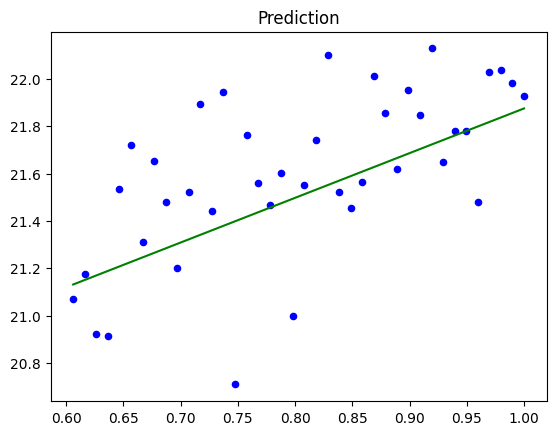

In [5]:
alpha = 0.01

regressor = LinearRegression(train_x, train_y)

cutter = 1
for i in range(10000):
    prediction = regressor.predict()
    loss = regressor.compute_loss(prediction)
    regressor.update_weights(alpha, prediction)

    if cutter == 200:
        print(i + 1, "epochs elapsed")
        print(f"Current loss - weight: {loss:.2} - {regressor.b1():.3}")
        cutter = 0
    cutter += 1
    
regressor.plot_best_fit(prediction, "Final Regression")

prediction = regressor.predict(test_x)
regressor.plot_best_fit(prediction, "Prediction", test_x, test_y, 'g')